### Using the same dataset used for SVC and checking the Random Forest Model Performance

### Business Objective

    To identify products at risk of backorder before the event occurs so the business has time to react. 

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer

In [58]:
#data = pd.read_csv("Backorders.csv",header=0)
import pandas as pd 
data=pd.read_csv('BackOrders.csv',skiprows=4,nrows=10000,na_values=['$','#','Null'])
data.shape

(10000, 23)

In [59]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,NaN,NaN,0.0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7.0,2.0,0.0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258.0,15.0,10.0,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46.0,2.0,0.0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2.0,2.0,0.0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


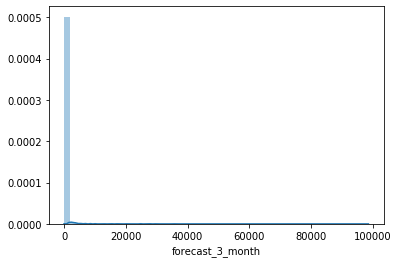

In [60]:
sns.distplot(data.forecast_3_month)

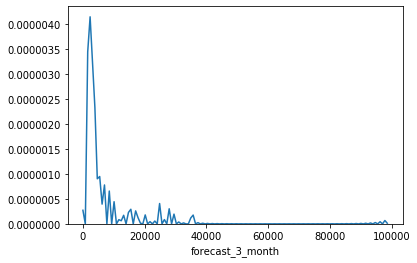

In [61]:
sns.distplot(data.forecast_3_month,hist=False)

### STANDARD Scaling

In [67]:
s1 = StandardScaler()
s1.fit(data[['forecast_3_month']])
data1 = pd.DataFrame(s1.transform(data[['forecast_3_month']]),columns = ['forecast_3_month'])
data1.head()

,forecast_3_month
0,-0.094572
1,-0.094572
2,-0.087715
3,-0.094572
4,-0.091829


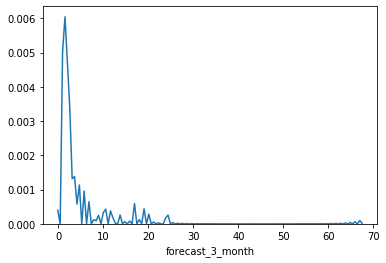

In [68]:
sns.distplot(data1.forecast_3_month,hist=False)

In [69]:
five = data.copy().forecast_3_month.values[0:5]
print(five)

[ 0  0 10  0  4]


In [70]:
print(data1.forecast_3_month.values[0:5])

[-0.09457239 -0.09457239 -0.08771499 -0.09457239 -0.09182943]


In [71]:
mean = data.forecast_3_month.mean()
sd = np.std(data.forecast_3_month)

five = [round((x-mean)/sd,8) for x in five]
print(five)

[-0.09457239, -0.09457239, -0.08771499, -0.09457239, -0.09182943]


### MIN MAX SCALER

In [72]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
s1 = MinMaxScaler()
s1.fit(data[['forecast_3_month']])
data1 = pd.DataFrame(s1.transform(data[['forecast_3_month']]),columns = ['forecast_3_month'])
data1.head()

,forecast_3_month
0,0.000000
1,0.000000
2,0.000101
3,0.000000
4,0.000041


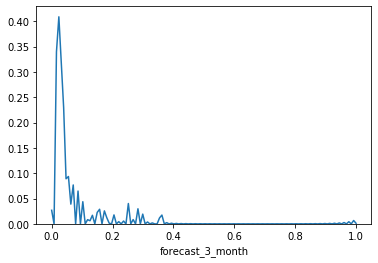

In [73]:
sns.distplot(data1.forecast_3_month,hist=False)

In [78]:
five = data.copy().forecast_3_month.values[0:5]
print(five)

[ 0  0 10  0  4]


In [79]:
print(data1.forecast_3_month.values[0:5])

[0.00000000e+00 0.00000000e+00 1.01473394e-04 0.00000000e+00
 4.05893575e-05]


In [80]:
minimum,maximum = min(data.forecast_3_month),max(data.forecast_3_month)
five = [(x-minimum)/(maximum-minimum) for x in five]
print(five)

[0.0, 0.0, 0.0001014733936761781, 0.0, 4.058935747047124e-05]


### Normalizer 

In [131]:
data[['forecast_3_month','forecast_6_month','forecast_9_month']].head()

,forecast_3_month,forecast_6_month,forecast_9_month
0,0,0,0
1,0,0,0
2,10,77,184
3,0,0,0
4,4,6,10


In [132]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
s1 = Normalizer()
s1.fit(data[['forecast_3_month','forecast_6_month','forecast_9_month']])
data1 = pd.DataFrame(s1.transform(data[['forecast_3_month','forecast_6_month','forecast_9_month']]),columns = ['forecast_3_month','forecast_6_month','forecast_9_month'])
data1.head()

,forecast_3_month,forecast_6_month,forecast_9_month
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.050072,0.385555,0.921325
3,0.000000,0.000000,0.000000
4,0.324443,0.486664,0.811107


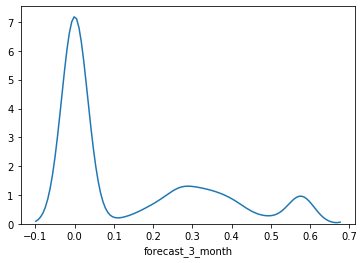

In [133]:
sns.distplot(data1.forecast_3_month,hist=False)

In [144]:
three = data[['forecast_3_month','forecast_6_month','forecast_9_month']].iloc[2].values.tolist()
print(three)

[10, 77, 184]


In [153]:
three1  = [x**2 for x in three]
sum(three1)

39885

In [154]:
l2_norm = np.sqrt(sum(three1))

In [155]:
three1 = [round(x/l2_norm,6) for x in three]
three1

[0.050072, 0.385555, 0.921325]

### Preprocessing Steps

In [56]:
##### 1) Read the 10000 rows of shared csv file
data=pd.read_csv("BackOrders.csv",nrows=10000,skiprows=4,na_values=['$','#',"Null"])
##### 2) Check the shape and head
data.shape
data.head()
##### 3) Split the data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(data.iloc[:,:-1],data.iloc[:,-1:],test_size=0.2)
print(xtrain.shape,xtest.shape)
train=pd.concat([xtrain,ytrain],axis=1)
test=pd.concat([xtest,ytest],axis=1)
##### 4) Remove the columns which have number of unique values more than 95%
train=train.drop(columns='sku',axis=1)
train.columns
test=test.drop(columns='sku',axis=1)
##### 5) Check the total number of null values in train data
train.isna().sum()
##### 6) If Null values present in the train data then check and report the column names having null values

##### 7) Define numerical and categorical columns and separate the datasets for both type of variables
cat_cols = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
X=data
from sklearn.preprocessing import LabelEncoder
for i in range(0,len(X.columns)):
    j=X.columns[i]
    if(j in cat_cols):
        le = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
        le.fit(X[j])
        X[j] = le.transform(X[j])
        X[j]=X[j].astype('category')

data1=X

num_cols = train.select_dtypes(exclude='category')
cat_cols = train.select_dtypes(include='category')
##### 8) Check the histograms of numerical columns and report which imputation is better mean/median
#for col in num_cols:
#    print(col)
#    sns.distplot(train[col],hist=False)
#    plt.show()
##### 9) Fill the null values in the train data with approriate imputations mean/median/mode
#for col in num_cols:
 #   train[col]=train[col].fillna(train[col].median())
train.isnull().sum()
##### 10) Check correlation data frame for the train data and put a threshold to remove highly correlated variables

##### 11) Check the count/frequency plots for categorical columns then observe the results

##### 12) Define both numerical and categorical columns list for which you want to remove

##### 13) Apply MinMaxScaler,StandardScaler,Normalizer scaling techniques and store the data in separate data frames
#####    and check the histograms for numerical columns after each scaling technque

##### 14) In train data replace categorical column labels with appropriate encoding
##### NOTE: If only 2 unique values then just use 'replace' function for encoding

(8000, 22) (2000, 22)


national_inv           3
lead_time            464
in_transit_qty         1
forecast_3_month       0
forecast_6_month       0
forecast_9_month       0
sales_1_month          0
sales_3_month          0
sales_6_month          0
sales_9_month          0
min_bank               0
potential_issue        0
pieces_past_due        0
perf_6_month_avg       0
perf_12_month_avg      0
local_bo_qty           0
deck_risk              0
oe_constraint          0
ppap_risk              0
stop_auto_buy          0
rev_stop               0
went_on_backorder      0
dtype: int64

#### Creating Multiple dataframes

In [8]:
### Now here you have following

######## Numerical data ##########

# 1) Separate Numrical data 
# 2) 3 types of scaled numerical data
# 3) 3 types of scaled Numerical data with removed columns

######## Categorical data ##########

# 4) Separate Categorical data
# 5) Categorical data with removed columns


### Your task here is to combine all dataframes means here you will get (1+3(scaled)+3(scaled_removed))*(1+1) = 14

#### Model Building

In [11]:
### Bulid models on generated datasets by doing train and valid split.

### Consider any preprocessed dataset of your interest and apply all models known to you
### and compare performances with Random Forest model performance

In [12]:
### After building each check model performance on separate test data which you separated first.

### For this process you need to the same preprocessing steps you have done previously for train data

## And report the performances